In [44]:
from astropy.visualization import quantity_support
from spectral_cube import SpectralCube
from astropy import units as u
import numpy as np
from astropy.io import fits
from astropy import wcs
import matplotlib.pyplot as plt

In [64]:
# SpectralCube.read().with_spectral_unit(u.GHz, velocity_convention='radio')
a_fixednames = [
    SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits').with_spectral_unit(u.km/u.second, velocity_convention='radio'),
    SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/ch3oh/g5a.CH3OH.spw21.fits').with_spectral_unit(u.km/u.second, velocity_convention='radio'),
    SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits').with_spectral_unit(u.km/u.second, velocity_convention='radio'),
    SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits').with_spectral_unit(u.km/u.second, velocity_convention='radio'),
    SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits').with_spectral_unit(u.km/u.second,  velocity_convention='radio'),
    SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits').with_spectral_unit(u.km/u.second, velocity_convention='radio'),
    SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits').with_spectral_unit(u.km/u.second, velocity_convention='radio')
    ]

In [65]:
# SpectralCube.read('',format='casa_image')
b_fixednames = [
    SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.12CO.spw17.im',format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K),
    SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/ch3oh/g5b.CH3OH.spw21.fits').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K),
    SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw23.im',format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K),
    SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw25.im',format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K),
    SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.SiO.spw27.im',format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K),
    SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.13CO.spw29.im',format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K),
    SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.C18O.spw31.im',format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K)
]

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encou

In [94]:
a_fixednames[0].allow_huge_operations=True

In [95]:
avspec_a = a_fixednames[0].to(u.K).mean(axis=(1,2))

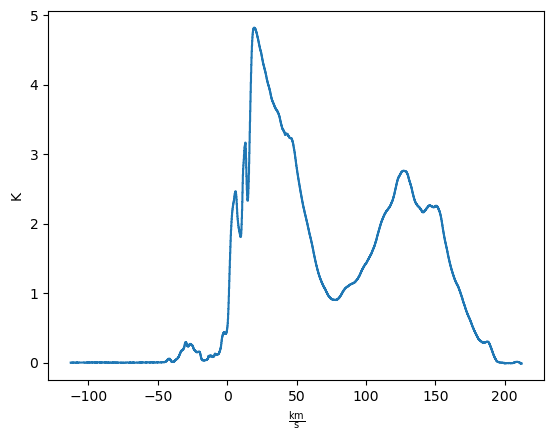

In [96]:
avspec_a.quicklook()

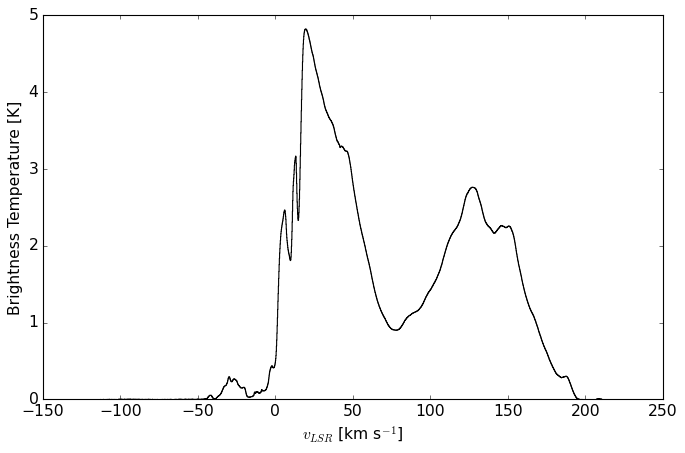

In [103]:
with quantity_support():
    with plt.style.context('classic'):
        plt.rcParams['font.size'] = 14
        plt.figure(figsize=(10,6), facecolor='w')
        #plt.plot(avspec_co.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=231.900928*u.GHz).spectral_axis, avspec_co, color='k')
        avspec_a.quicklook(color='k')
        #plt.plot(avspec_a)#.with_spectral_unit(u.km/u.s, velocity_convention='radio'))
        #plt.fill_between(avspec_a.with_spectral_unit(u.km/u.second).spectral_axis, np.zeros_like(avspec_a), avspec_a, color='y')
        plt.ylabel("Brightness Temperature [K]")
        plt.xlabel("$v_{LSR}$ [km s$^{-1}$]")
        plt.ylim(0)
        ax = plt.gca()
        ax.get_xaxis().get_major_formatter().set_useOffset(False)
        plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/Field2_spec.pdf')

In [98]:
avspec_b = b_fixednames[0].to(u.K).mean(axis=(1,2))

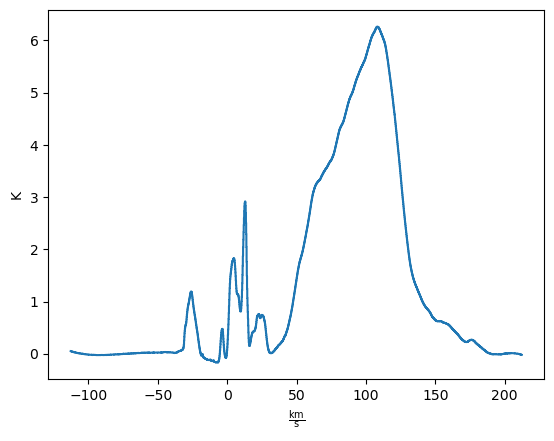

In [99]:
avspec_b.quicklook()

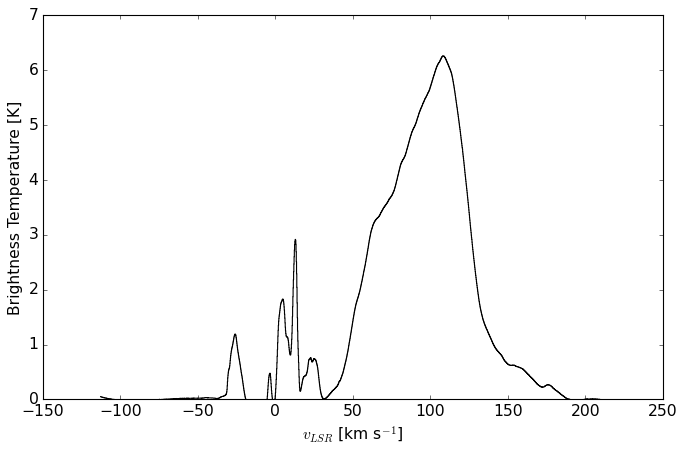

In [100]:
with quantity_support():
    with plt.style.context('classic'):
        plt.rcParams['font.size'] = 14
        plt.figure(figsize=(10,6), facecolor='w')
        #plt.plot(avspec_co.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=231.900928*u.GHz).spectral_axis, avspec_co, color='k')
        avspec_b.quicklook(color='k')
        #plt.plot(avspec_a)#.with_spectral_unit(u.km/u.s, velocity_convention='radio'))
        #plt.fill_between(avspec_a.with_spectral_unit(u.km/u.second).spectral_axis, np.zeros_like(avspec_a), avspec_a, color='y')
        plt.ylabel("Brightness Temperature [K]")
        plt.xlabel("$v_{LSR}$ [km s$^{-1}$]")
        plt.ylim(0)
        ax = plt.gca()
        ax.get_xaxis().get_major_formatter().set_useOffset(False)
        #plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/H30a.spec.pdf')

In [73]:
5*u.degree + 29*u.arcmin

<Quantity 5.48333333 deg>